# NumPy: Arreglos numéricos para Python

----

**Nota Importante**: Los contenidos de esta lección son una reediсión de [Data Science for Everyone](https://github.com/ellisonbg/ds4e), por Brian Granger

----

NumPy es el módulo básico para la computación científica y la ciencia de datos en Python. Su objeto más usado son los arreglos multidimensionales, los cuales tienen las siguientes características:

* Los arreglos tienen cualquier número de dimensiones.
* Todos los elementos de un arreglo tienen el mismo tipo de datos.
* Los elementos de un arreglo son usualmente tipos de datos nativos (e.g. enteros, cadenas, etc).
* La memoria de un arreglo es un bloqueo contiguo que puede ser fácilmente pasado a otras librerías numéricas (BLAS, LAPACK, etc.).
* La mayoría de NumPy está implementado en C, por lo que es bastante rápido.

## Tipo de arreglo multidimensional

Esta es la forma canónica en que se importa Numpy y se crea un arreglo

In [1]:
import numpy as np

In [2]:
data = [0,2.,4,6]
a = np.array(data)

In [3]:
type(a)

numpy.ndarray

In [4]:
a

array([ 0.,  2.,  4.,  6.])

La forma de un arreglo:

In [5]:
a.shape

(4,)

El número de dimensiones del arreglo:

In [6]:
a.ndim

1

El número de elementos del arreglo:

In [7]:
a.size

4

El número de bytes que ocupa el arreglo:

In [8]:
a.nbytes

32

El atributo `dtype` describe el "tipo de datos" (data type) de los elementos:

In [9]:
a.dtype

dtype('float64')

## Creando arreglos

Los arreglos pueden ser creaados con listas or tuplas anidadas:

In [10]:
data = [[0.0, 2.0, 4.0, 6.0], [1.0, 3.0, 5.0, 7.0]]
b = np.array(data)

In [11]:
b

array([[ 0.,  2.,  4.,  6.],
       [ 1.,  3.,  5.,  7.]])

In [12]:
b.shape, b.ndim, b.size, b.nbytes

((2, 4), 2, 8, 64)

La función `arange` es similar a la función `range` de Python, pero crea un arreglo:

In [13]:
c = np.arange(0.0, 10.0, 1.0) # paso entre valores de 1.0
c

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

La función `linspace` es similar, pero permite especificar el número de puntos:

In [14]:
e = np.linspace(0.0, 5.0, 11) # 11 points
e

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

También hay funciones `empty`, `zeros` y `ones` (como en Matlab):

In [15]:
np.empty((4,4))

array([[  6.92616278e-310,   6.59066180e-317,   0.00000000e+000,
          6.92616367e-310],
       [  6.92616359e-310,   6.92616359e-310,   0.00000000e+000,
          6.92616363e-310],
       [  0.00000000e+000,   0.00000000e+000,   6.92616359e-310,
          0.00000000e+000],
       [  0.00000000e+000,   6.92616359e-310,   6.92616359e-310,
          6.92615590e-310]])

In [16]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [17]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

Exploren también las siguientes funciones:

* `empty_like`, `ones_like`, `zeros_like`
* `eye`, `identity`, `diag`

## dtype

Los arreglos tienen un atributo `dtype` que guarda el tipo de datos de cada elemento. Puede ser definido:

* Implicitamente por el tipo de elemento
* Al pasarle el argumento `dtype` a una función de creación de arreglos

Este es un arreglo de tipo entero:

In [18]:
a = np.array([0, 1, 2, 3])

In [19]:
a, a.dtype

(array([0, 1, 2, 3]), dtype('int64'))

Todas las funciones de creación de arreglos aceptan un argumentp opcional `dtype`:

In [20]:
b = np.zeros((2,2), dtype=np.complex64)
b

array([[ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j]], dtype=complex64)

In [21]:
c = np.arange(0, 10, 2, dtype=np.float)
c

array([ 0.,  2.,  4.,  6.,  8.])

También es posible usar el método `astype` para crear una copia del arreglo con un `dtype` dado:

In [22]:
d = c.astype(dtype=np.int)
d

array([0, 2, 4, 6, 8])

La documentación de NumPy sobre [dtypes](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) (en inglés) describe todas las formas que existen para especificar dtypes.

## Operaciones sobre arreglos

Las operaciones matemáticas básicas son **elemento a elemento** para:

* Números y arreglos
* Arreglos y arreglos

Por ejemplo, a continuacuón creamos un arreglo vacío y lo llenamos con un valor

In [23]:
a = np.empty((3,3))
a.fill(0.1)
a

array([[ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1]])

In [24]:
b = np.ones((3,3))
b

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

La adición es elemento a elemento:

In [25]:
a + b

array([[ 1.1,  1.1,  1.1],
       [ 1.1,  1.1,  1.1],
       [ 1.1,  1.1,  1.1]])

La división es elemento a elemento:

In [26]:
a / b

array([[ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1]])

Como también lo son las potencias:

In [27]:
a**2

array([[ 0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01]])

La multiplicación por un escalar es también elemento a elemento:

In [28]:
np.pi * b

array([[ 3.14159265,  3.14159265,  3.14159265],
       [ 3.14159265,  3.14159265,  3.14159265],
       [ 3.14159265,  3.14159265,  3.14159265]])

## Indexado and rebanado

El indexado y rebanado proveen una forma eficiente de obtener los valores de un arreglo y de modificarlos.

In [29]:
%precision 2

'%.2f'

In [30]:
a = np.random.rand(9, 9)

In [31]:
a

array([[ 0.95,  0.74,  0.21,  0.59,  0.74,  0.38,  0.62,  0.52,  0.33],
       [ 0.95,  0.17,  0.98,  0.19,  0.54,  0.58,  0.68,  0.31,  0.62],
       [ 0.62,  0.34,  0.94,  0.89,  0.64,  0.3 ,  0.88,  0.95,  0.46],
       [ 0.26,  0.03,  0.52,  0.61,  0.58,  0.58,  0.51,  0.38,  0.35],
       [ 0.81,  0.85,  0.25,  0.17,  0.27,  0.63,  0.68,  0.48,  0.54],
       [ 0.13,  0.31,  0.59,  0.91,  0.02,  0.09,  0.41,  0.2 ,  0.16],
       [ 0.42,  0.69,  0.88,  0.96,  0.45,  0.41,  0.07,  0.26,  0.97],
       [ 0.72,  0.36,  0.42,  1.  ,  0.8 ,  0.92,  0.53,  0.78,  0.36],
       [ 0.05,  0.73,  0.91,  0.86,  0.97,  0.03,  0.16,  0.31,  0.88]])

Al igual que las listas y tuplas de Python, los arreglos de NumPy tienen un indexado que empieza en cero y utilizan los corchetes (`[]`) para obtener y definir valores:

In [32]:
a[0,0]

0.95

Un índice de `-1` se refiere al último elemento a lo largo de un eje:

In [33]:
a[-1,-1]

0.88

El extraer la columna 0 usa la sintaxis `:`, que denota todos los elementos a lo largo de un eje.

In [34]:
a[:,0]

array([ 0.95,  0.95,  0.62,  0.26,  0.81,  0.13,  0.42,  0.72,  0.05])

La última fila se extrae así:

In [35]:
a[-1,:]

array([ 0.05,  0.73,  0.91,  0.86,  0.97,  0.03,  0.16,  0.31,  0.88])

También se pueden rebanar rangos, así:

In [36]:
a[0:2,0:2]

array([[ 0.95,  0.74],
       [ 0.95,  0.17]])

La asignación también funciona con rebanados:

In [37]:
a[0:5,0:5] = 1.0

In [38]:
a

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.38,  0.62,  0.52,  0.33],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.58,  0.68,  0.31,  0.62],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.3 ,  0.88,  0.95,  0.46],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.58,  0.51,  0.38,  0.35],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.63,  0.68,  0.48,  0.54],
       [ 0.13,  0.31,  0.59,  0.91,  0.02,  0.09,  0.41,  0.2 ,  0.16],
       [ 0.42,  0.69,  0.88,  0.96,  0.45,  0.41,  0.07,  0.26,  0.97],
       [ 0.72,  0.36,  0.42,  1.  ,  0.8 ,  0.92,  0.53,  0.78,  0.36],
       [ 0.05,  0.73,  0.91,  0.86,  0.97,  0.03,  0.16,  0.31,  0.88]])

Es importante notar como aún cuando asignamos el valor a una porción, el arreglo original fue modificado. Esto demuestra que los rebanadosson **vistas** de los mismos datos, no una copia de los mismos.

### Indexado booleano

Los arreglos pueden ser indexados usando otros arreglos que tienen valores booleanos.

In [39]:
edades = np.array([23, 56, 67, 89, 23, 56, 27, 12, 8, 72])
generos = np.array(['m', 'm', 'f', 'f', 'm', 'f', 'm', 'm' ,'m', 'f'])

Las expresiones booleanas que involucran arreglos crean nuevos arreglos con un tipo de datos `bool` y el resultado elemento a elemento de expresiones de la forma:

In [40]:
edades > 30

array([False,  True,  True,  True, False,  True, False, False, False,  True], dtype=bool)

In [41]:
generos == 'm'

array([ True,  True, False, False,  True, False,  True,  True,  True, False], dtype=bool)

Las expresiones booleanas proveen una forma extremadamente rápida y flexible de consultar los contenidos de arreglos:

In [42]:
(edades > 10) & (edades < 50)

array([ True, False, False, False,  True, False,  True,  True, False, False], dtype=bool)

Es posible usar un arreglo booleano para para indexar el arreglo original u otro arreglo. Por ejemplo, la siguiente expresión seleccciona las edades de todas las mujeres en el arreglo `generos`:

In [43]:
mascara = (generos == 'f')
edades[mascara]

array([67, 89, 56, 72])

In [44]:
edades[edades > 30]

array([56, 67, 89, 56, 72])

## Cambiar la forma y transponer arreglos

In [45]:
a = np.random.rand(3,4)

In [46]:
a

array([[ 0.39,  0.87,  0.16,  0.53],
       [ 0.39,  0.4 ,  0.56,  0.78],
       [ 0.77,  0.99,  0.86,  0.69]])

el atributo `T` contiene la transpuesta del arreglo original:

In [47]:
a.T

array([[ 0.39,  0.39,  0.77],
       [ 0.87,  0.4 ,  0.99],
       [ 0.16,  0.56,  0.86],
       [ 0.53,  0.78,  0.69]])

El método `reshape` puede ser usado para cambiar la forma y el número de dimensiones de un arreglo:

In [48]:
a.reshape(2,6)

array([[ 0.39,  0.87,  0.16,  0.53,  0.39,  0.4 ],
       [ 0.56,  0.78,  0.77,  0.99,  0.86,  0.69]])

In [49]:
a.reshape(6,2)

array([[ 0.39,  0.87],
       [ 0.16,  0.53],
       [ 0.39,  0.4 ],
       [ 0.56,  0.78],
       [ 0.77,  0.99],
       [ 0.86,  0.69]])

El método `ravel` convierte un arreglo de cualquier número de dimensiones en uno de una sola dimensión:

In [50]:
a.ravel()

array([ 0.39,  0.87,  0.16,  0.53,  0.39,  0.4 ,  0.56,  0.78,  0.77,
        0.99,  0.86,  0.69])

## Funciones universales

Las funciones universales, o "ufuncs," son funciones que toman y retornan arreglos o números. Éstas tienen las siguientes características:

* Implementaciones vectorizadas en C, las cuales son mucho más rápidas que ciclos `for` en Python.
* Permiten escribir código mucho más compacto
* Aquí se encuentra una lista completa de [todas las funciones universales de NumPy](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs) (en inglés).

Esta es una secuencia lineal de valores

In [51]:
t = np.linspace(0.0, 4*np.pi, 100)
t

array([  0.  ,   0.13,   0.25,   0.38,   0.51,   0.63,   0.76,   0.89,
         1.02,   1.14,   1.27,   1.4 ,   1.52,   1.65,   1.78,   1.9 ,
         2.03,   2.16,   2.28,   2.41,   2.54,   2.67,   2.79,   2.92,
         3.05,   3.17,   3.3 ,   3.43,   3.55,   3.68,   3.81,   3.93,
         4.06,   4.19,   4.32,   4.44,   4.57,   4.7 ,   4.82,   4.95,
         5.08,   5.2 ,   5.33,   5.46,   5.59,   5.71,   5.84,   5.97,
         6.09,   6.22,   6.35,   6.47,   6.6 ,   6.73,   6.85,   6.98,
         7.11,   7.24,   7.36,   7.49,   7.62,   7.74,   7.87,   8.  ,
         8.12,   8.25,   8.38,   8.5 ,   8.63,   8.76,   8.89,   9.01,
         9.14,   9.27,   9.39,   9.52,   9.65,   9.77,   9.9 ,  10.03,
        10.15,  10.28,  10.41,  10.54,  10.66,  10.79,  10.92,  11.04,
        11.17,  11.3 ,  11.42,  11.55,  11.68,  11.8 ,  11.93,  12.06,
        12.19,  12.31,  12.44,  12.57])

Este es el resultado de la función seno aplicada a todos los elementos del arreglo:

In [52]:
np.sin(t)

array([  0.00e+00,   1.27e-01,   2.51e-01,   3.72e-01,   4.86e-01,
         5.93e-01,   6.90e-01,   7.76e-01,   8.50e-01,   9.10e-01,
         9.55e-01,   9.85e-01,   9.99e-01,   9.97e-01,   9.79e-01,
         9.45e-01,   8.96e-01,   8.33e-01,   7.56e-01,   6.67e-01,
         5.67e-01,   4.58e-01,   3.42e-01,   2.20e-01,   9.51e-02,
        -3.17e-02,  -1.58e-01,  -2.82e-01,  -4.01e-01,  -5.14e-01,
        -6.18e-01,  -7.13e-01,  -7.96e-01,  -8.66e-01,  -9.22e-01,
        -9.64e-01,  -9.90e-01,  -1.00e+00,  -9.94e-01,  -9.72e-01,
        -9.34e-01,  -8.81e-01,  -8.15e-01,  -7.35e-01,  -6.43e-01,
        -5.41e-01,  -4.30e-01,  -3.12e-01,  -1.89e-01,  -6.34e-02,
         6.34e-02,   1.89e-01,   3.12e-01,   4.30e-01,   5.41e-01,
         6.43e-01,   7.35e-01,   8.15e-01,   8.81e-01,   9.34e-01,
         9.72e-01,   9.94e-01,   1.00e+00,   9.90e-01,   9.64e-01,
         9.22e-01,   8.66e-01,   7.96e-01,   7.13e-01,   6.18e-01,
         5.14e-01,   4.01e-01,   2.82e-01,   1.58e-01,   3.17e

Como muestran los siguientes ejemplos, múltiples ufuncs pueden ser usadas para crear complejas expresiones matemáticas que pueden ser calculadas eficientemente:

In [53]:
np.exp(np.sqrt(t))

array([  1.  ,   1.43,   1.66,   1.85,   2.04,   2.22,   2.39,   2.57,
         2.74,   2.91,   3.09,   3.26,   3.44,   3.61,   3.79,   3.97,
         4.16,   4.34,   4.53,   4.73,   4.92,   5.12,   5.32,   5.52,
         5.73,   5.94,   6.15,   6.37,   6.59,   6.81,   7.04,   7.27,
         7.5 ,   7.74,   7.98,   8.23,   8.48,   8.73,   8.99,   9.25,
         9.52,   9.79,  10.06,  10.34,  10.63,  10.91,  11.21,  11.5 ,
        11.8 ,  12.11,  12.42,  12.73,  13.05,  13.38,  13.71,  14.04,
        14.38,  14.73,  15.08,  15.43,  15.8 ,  16.16,  16.53,  16.91,
        17.29,  17.68,  18.07,  18.47,  18.88,  19.29,  19.7 ,  20.13,
        20.56,  20.99,  21.43,  21.88,  22.33,  22.79,  23.26,  23.73,
        24.21,  24.69,  25.18,  25.68,  26.19,  26.7 ,  27.22,  27.75,
        28.28,  28.82,  29.37,  29.92,  30.49,  31.06,  31.63,  32.22,
        32.81,  33.41,  34.02,  34.64])

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

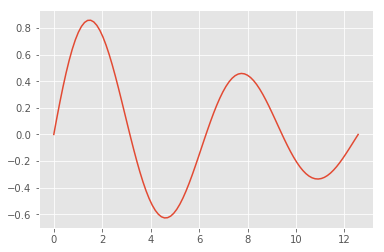

In [55]:
plt.plot(t, np.exp(-0.1*t)*np.sin(t))

En general, siempre se debería intentar utilizar las ufuncs en lugar de ciclos for. Esta clase de cálculos basados en arreglos se conocen como *vectorizados*.

## Procesamiento básico de datos

In [56]:
edades = np.array([23, 56, 67, 89, 23, 56, 27, 12, 8, 72])
generos = np.array(['m', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'm', 'f'])

Numpy tiene un conjunto básico de métodos y funciones para calcular cantidades básicas sobre ciertos datos.

In [57]:
edades.min(), edades.max()

(8, 89)

Calcular la media:

In [58]:
edades.mean()

43.30

Calcular la varianza y la desviación estandar:

In [59]:
edades.var(), edades.std()

(711.21, 26.67)

La función `bincount` cuenta cuantas veces ocurre cada valor en un arreglo:

In [60]:
np.bincount(edades)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

Los métodos `cumsum` y `cumprod` calculan las sumas y productos acumulados:

In [61]:
edades.cumsum()

array([ 23,  79, 146, 235, 258, 314, 341, 353, 361, 433])

In [62]:
edades.cumprod()

array([              23,             1288,            86296,
                7680344,        176647912,       9892283072,
           267091642944,    3205099715328,   25640797722624,
       1846137436028928])

La mayoría de las funciones y métodos anteriores toman un argumento llamado `axis` que aplica la operación a lo largo de un eje particular:

In [63]:
a = np.random.randint(0, 10, (3,4))
a

array([[3, 4, 8, 4],
       [2, 5, 8, 1],
       [2, 8, 5, 2]])

Con `axis=0`, la operación toma lugar a lo largo de las filas:

In [64]:
a.sum(axis=0)

array([ 7, 17, 21,  7])

Con `axis=1` la operación toma lugar a lo largo de las columnas:

In [65]:
a.sum(axis=1)

array([19, 16, 17])

La función `unique` es muy útil para trabajar con datos categóricos:

In [66]:
np.unique(generos)

array(['f', 'm'], 
      dtype='<U1')

In [67]:
np.unique(generos, return_counts=True)

(array(['f', 'm'], 
       dtype='<U1'), array([4, 6]))

La función `where` permite aplicar lógica condicional a los arreglos. Este es un esquema de cómo funciona:

```python
np.where(condicion, si_falsa, si_verdadera)
```

In [68]:
np.where(edades > 30, 0, 1)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

Los valores `si_falsa` y `si_verdadera` pueden ser arreglos:

In [69]:
np.where(edades < 30, 0, edades)

array([ 0, 56, 67, 89,  0, 56,  0,  0,  0, 72])

## Lectura y escritura de archivos

NumPy tiene varias funciones para leer y escribir arreglos de y hacia el sistema operativo.

### Single array, binary format

In [70]:
a = np.random.rand(10)
a

array([ 0.19,  0.24,  0.57,  0.45,  0.81,  0.36,  0.1 ,  0.42,  0.48,  0.09])

Save the array to a binary file named `array1.npy`:

In [71]:
np.save('array1', a)

In [72]:
ls

'01. Numpy.ipynb'           MatplotlibBasico.ipynb   array2.txt
'02. Matplotlib.ipynb'      Pandas/                  arrays.npz
'04. Otros modulos.ipynb'   array1.npy               numpy.ipynb


Load the array back into memory:

In [73]:
a_copy = np.load('array1.npy')

In [74]:
a_copy

array([ 0.19,  0.24,  0.57,  0.45,  0.81,  0.36,  0.1 ,  0.42,  0.48,  0.09])

### Single array, text format

In [75]:
b = np.random.randint(0, 10, (5,3))
b

array([[0, 5, 7],
       [9, 4, 1],
       [1, 2, 1],
       [2, 0, 8],
       [1, 5, 8]])

The `savetxt` function saves arrays in a simple, textual format that is less effecient, but easier for other languges to read:

In [76]:
np.savetxt('array2.txt', b)

In [77]:
ls

'01. Numpy.ipynb'           MatplotlibBasico.ipynb   array2.txt
'02. Matplotlib.ipynb'      Pandas/                  arrays.npz
'04. Otros modulos.ipynb'   array1.npy               numpy.ipynb


Using `%pycat` to look at the contents shows that the files is indeed a plain text file:

In [78]:
%pycat array2.txt

In [79]:
np.loadtxt('array2.txt')

array([[ 0.,  5.,  7.],
       [ 9.,  4.,  1.],
       [ 1.,  2.,  1.],
       [ 2.,  0.,  8.],
       [ 1.,  5.,  8.]])

### Multiple arrays, binary format

The `savez` function provides an efficient way of saving multiple arrays to a single file:

In [80]:
np.savez('arrays.npz', a=a, b=b)

The `load` function returns a dictionary like object that provides access to the individual arrays:

In [81]:
a_and_b = np.load('arrays.npz')

In [82]:
a_and_b['a']

array([ 0.19,  0.24,  0.57,  0.45,  0.81,  0.36,  0.1 ,  0.42,  0.48,  0.09])

In [83]:
a_and_b['b']

array([[0, 5, 7],
       [9, 4, 1],
       [1, 2, 1],
       [2, 0, 8],
       [1, 5, 8]])

## Algebra lineal

NumPy has excellent linear algebra capabilities.

In [84]:
a = np.random.rand(5,5)
b = np.random.rand(5,5)

Remember that array operations are elementwise. Thus, this is **not** matrix multiplication:

In [85]:
a * b

array([[ 0.11,  0.44,  0.18,  0.06,  0.01],
       [ 0.27,  0.42,  0.48,  0.08,  0.23],
       [ 0.29,  0.18,  0.38,  0.67,  0.67],
       [ 0.31,  0.01,  0.13,  0.1 ,  0.24],
       [ 0.3 ,  0.57,  0.27,  0.1 ,  0.34]])

To get matrix multiplication use `np.dot`:

In [86]:
np.dot(a, b)

array([[ 0.96,  1.08,  1.01,  0.66,  0.71],
       [ 1.94,  1.6 ,  1.51,  1.85,  1.64],
       [ 2.18,  1.78,  1.56,  1.63,  1.58],
       [ 2.03,  1.27,  1.19,  1.58,  1.46],
       [ 1.55,  1.49,  1.38,  1.59,  1.39]])

Or, NumPy as a `matrix` subclass for which matrix operations are the default:

In [87]:
m1 = np.matrix(a)
m2 = np.matrix(b)

In [88]:
m1 * m2

matrix([[ 0.96,  1.08,  1.01,  0.66,  0.71],
        [ 1.94,  1.6 ,  1.51,  1.85,  1.64],
        [ 2.18,  1.78,  1.56,  1.63,  1.58],
        [ 2.03,  1.27,  1.19,  1.58,  1.46],
        [ 1.55,  1.49,  1.38,  1.59,  1.39]])

The `np.linalg` package has a wide range of fast linear algebra operations.

Here is determinant:

In [89]:
np.linalg.det(a)

-0.01

Matrix inverse:

In [90]:
np.linalg.inv(a)

array([[  3.07,  -3.73,  -4.43,   4.03,   3.93],
       [ -0.16,  -2.23,   1.52,  -0.38,   1.6 ],
       [  0.16,  14.36,   0.19,  -4.77, -11.53],
       [  1.24,   1.67,  -0.5 ,   1.  ,  -2.87],
       [ -2.69, -10.54,   2.  ,   2.03,   9.79]])

Eigenvalues:

In [91]:
np.linalg.eigvals(a)

array([ 2.68+0.j  , -0.35+0.j  ,  0.12+0.08j,  0.12-0.08j,  0.43+0.j  ])

## Random numbers

NumPy has functions for creating arrays of random numbers from different distributions in `np.random`, as well as handling things like permutation, shuffling, and choosing.

Here is the [numpy.random documentation](http://docs.scipy.org/doc/numpy/reference/routines.random.html).

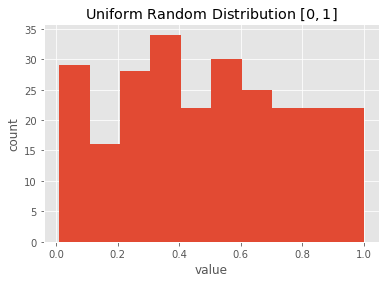

In [92]:
plt.hist(np.random.random(250))
plt.title('Uniform Random Distribution $[0,1]$')
plt.xlabel('value')
plt.ylabel('count')

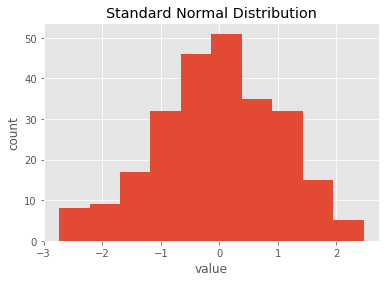

In [93]:
plt.hist(np.random.randn(250))
plt.title('Standard Normal Distribution')
plt.xlabel('value')
plt.ylabel('count')

The `shuffle` function shuffles an array in place:

In [94]:
a = np.arange(0,10)
print(a)
np.random.shuffle(a)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[2 6 3 8 5 4 1 0 9 7]


The `permutation` function does the same thing but first makes a copy:

In [95]:
a = np.arange(0,10)
print(np.random.permutation(a))
print(a)

[1 3 0 8 4 7 9 2 6 5]
[0 1 2 3 4 5 6 7 8 9]


The `choice` function provides a powerful way of creating synthetic data sets of discrete data:

In [96]:
np.random.choice(['m','f'], 20, p=[0.25,0.75])

array(['f', 'f', 'm', 'f', 'f', 'm', 'f', 'f', 'f', 'm', 'f', 'f', 'f',
       'f', 'f', 'f', 'f', 'f', 'f', 'f'], 
      dtype='<U1')

## Vectorización

Vectorización es la manera más fácil de acelerar programas de python. Se utiliza cuando hay cómputos pesados con arreglos. Adicionalmente, la vectorización produce código que es más fácil de leer.


In [97]:
datos = np.random.random(10000)
def function(x):
    return np.log(x)
%timeit  resultados=[function(x) for x in datos]
%timeit  resultados=function(datos)

8.17 ms ± 295 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
251 µs ± 5.03 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


No todas las funciones se vectorizan automáticamente

In [98]:
def escalon(x):
    if x<0:
        return 0.
    else:
        return 1.
escalon(np.linspace(-1,1,3))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Puede usarse la función vectorize, que no es muy eficiente, para vectorizar la función

In [100]:
escalonvec = np.vectorize(escalon)
print(escalonvec(np.linspace(-1,1,30)))
%timeit escalonvec(np.linspace(-1,1,30))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
33.9 µs ± 904 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Podemos reescribirlo usando funciones de numpy

In [101]:
def escalon2(x):
    return np.where(x<0,0,1)

print(escalon2(np.linspace(-1,1,30)))
%timeit escalon2(np.linspace(-1,1,30))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
8.76 µs ± 58.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Resources

* [NumPy Reference Documentation](http://docs.scipy.org/doc/numpy/reference/)
* [Python Scientific Lecture Notes](http://scipy-lectures.github.io/index.html), Edited by Valentin Haenel,
Emmanuelle Gouillart and Gaël Varoquaux.
* [Lectures on Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures), J.R. Johansson.
* [Introduction to Scientific Computing in Python](http://nbviewer.ipython.org/github/jakevdp/2014_fall_ASTR599/tree/master/), Jake Vanderplas.